# Introducción al Análisis de Datos con SQL y Python

Este notebook combina **SQL** y **Python (pandas, seaborn, matplotlib)** para realizar análisis de datos básicos y prácticos.

Se busca que el estudiante comprenda **cómo fluye la información**, desde su almacenamiento y limpieza, hasta la interpretación visual y toma de decisiones.

### Contenido:
1. Tipos y estructura de datos
2. Ciclo de vida de los datos
3. Fases del análisis de datos
4. Herramientas SQL + Python
5. Transformación y extracción con SQL
6. Limpieza y ordenamiento en Python
7. Visualización de resultados


## 1. Tipos y Estructura de Datos

Los datos pueden clasificarse según su naturaleza o estructura:

- **Numéricos**: cantidades o medidas (edad, altura, precio).
- **Categóricos**: etiquetas o grupos (género, estado civil, ciudad).
- **Texto**: cadenas largas o descripciones (reseñas, comentarios).
- **Tiempo/Fechas**: registros temporales.
- **Estructurados**: almacenados en tablas, bases de datos SQL.
- **No estructurados**: imágenes, videos, texto libre.


In [1]:
import pandas as pd

# Ejemplo: estructura tabular con diferentes tipos de datos
data = pd.DataFrame({
    'ID': [1, 2, 3],
    'Nombre': ['Ana', 'Luis', 'Marta'],
    'Edad': [23, 35, 29],
    'Fecha_registro': pd.to_datetime(['2021-01-01', '2021-03-15', '2021-07-30'])
})

data

,ID,Nombre,Edad,Fecha_registro
0,1,Ana,23,2021-01-01
1,2,Luis,35,2021-03-15
2,3,Marta,29,2021-07-30


Observa cómo **pandas** detecta automáticamente los tipos de datos. Puedes verificarlo con `data.dtypes`.

##  2. Etapas del Ciclo de Vida de los Datos

1. **Generación u obtención**: los datos se crean o recolectan.
2. **Almacenamiento**: se guardan en sistemas o bases.
3. **Procesamiento**: se limpian y transforman.
4. **Análisis**: se exploran relaciones o patrones.
5. **Visualización**: se comunican los hallazgos.
6. **Toma de decisiones**: se aplican los resultados.

## ️ 3. Las Seis Fases del Análisis de Datos
1. Definir el objetivo o pregunta.
2. Recolectar datos.
3. Limpiar y preparar.
4. Analizar (explorar y modelar).
5. Visualizar resultados.
6. Comunicar conclusiones.

##  4. Herramientas Clave

- **SQL** → extracción, filtrado y unión de datos.
- **Python** → limpieza, análisis y visualización.
- **pandas / numpy** → manipulación.
- **matplotlib / seaborn** → visualización.
- **scikit-learn** → modelado y machine learning.


##  5. Transformación de Datos con SQL

Simulemos una pequeña base de datos en **SQLite (en memoria)** y consultemos clientes con gasto mayor a 100.

In [2]:
import sqlite3

# Crear base de datos en memoria
conn = sqlite3.connect(':memory:')
cur = conn.cursor()

# Crear tabla y agregar registros
cur.execute('''CREATE TABLE clientes (
               id INTEGER, nombre TEXT, edad INTEGER, gasto REAL)''')

cur.executemany('INSERT INTO clientes VALUES (?,?,?,?)', [
    (1, 'Ana', 23, 120.5),
    (2, 'Luis', 35, 80.0),
    (3, 'Marta', 29, 150.75)
])
conn.commit()

# Consultar clientes con gasto > 100
pd.read_sql_query("SELECT * FROM clientes WHERE gasto > 100", conn)

,id,nombre,edad,gasto
0,1,Ana,23,120.50
1,3,Marta,29,150.75


 **Interpretación:** SQL nos permite filtrar rápidamente información relevante. Estos clientes podrían representar a los más rentables.

## ⚖ 6. Datos Sesgados e Imparciales

- **Sesgo:** los datos no representan la realidad completa.
  - Ejemplo: encuesta solo a jóvenes → sesgo etario.
- **Imparcialidad:** conjunto de datos balanceado y representativo.

Evitar sesgos mejora la **validez de los modelos y conclusiones**.

##  7. Limpieza de Datos en Python
El paso más importante antes de analizar. Ejemplo: eliminar duplicados e imputar valores faltantes.

In [3]:
df = pd.DataFrame({
    'Nombre': ['Ana', 'Luis', 'Luis', 'Marta'],
    'Edad': [23, 35, None, 29],
    'Gasto': [120.5, 80.0, 80.0, None]
})

print('Antes de limpieza:\n', df)

# Eliminar duplicados
df = df.drop_duplicates()

# Imputar valores faltantes con la media
df['Edad'] = df['Edad'].fillna(df['Edad'].mean())
df['Gasto'] = df['Gasto'].fillna(df['Gasto'].mean())

print('\nDespués de limpieza:\n', df)

Antes de limpieza:
   Nombre  Edad  Gasto
0    Ana  23.0  120.5
1   Luis  35.0   80.0
2   Luis   NaN   80.0
3  Marta  29.0    NaN

Después de limpieza:
   Nombre  Edad  Gasto
0    Ana  23.0  120.5
1   Luis  35.0   80.0
2   Luis  29.0   80.0
3  Marta  29.0   93.5


Limpieza = consistencia + confiabilidad.

La **imputación** evita eliminar filas valiosas, sustituyendo valores faltantes por medidas estadísticas (media, mediana, moda).

##  8. Ordenación de Datos
Podemos organizar los datos según una métrica, por ejemplo, el gasto de mayor a menor:

In [4]:
df.sort_values(by='Gasto', ascending=False)

,Nombre,Edad,Gasto
0,Ana,23.0,120.5
3,Marta,29.0,93.5
1,Luis,35.0,80.0
2,Luis,29.0,80.0


Esto facilita identificar **patrones de consumo** o clientes prioritarios.

## 9. Extracción de Datos con SQL

Ordenamos directamente desde SQL, sin pasar a pandas:

In [5]:
pd.read_sql_query("SELECT nombre, gasto FROM clientes ORDER BY gasto DESC", conn)

,nombre,gasto
0,Marta,150.75
1,Ana,120.50
2,Luis,80.00


SQL y pandas pueden complementarse: SQL para **extracción** y pandas para **procesamiento**.

##  10. Visualización de Datos

Finalmente, representamos los datos gráficamente para facilitar la interpretación.

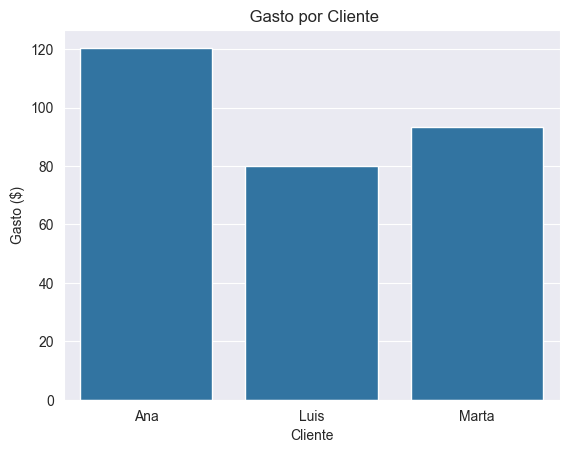

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x='Nombre', y='Gasto', data=df)
plt.title(' Gasto por Cliente')
plt.xlabel('Cliente')
plt.ylabel('Gasto ($)')
plt.show()

Las visualizaciones permiten comunicar hallazgos a personas no técnicas. Aquí, identificamos a **Ana** como la clienta con mayor gasto promedio.

---
##  Conclusiones

En este notebook aprendiste a:
- Comprender el ciclo de vida de los datos.
- Extraer y transformar información con SQL.
- Limpiar, ordenar y analizar con pandas.
- Visualizar con seaborn/matplotlib.

El flujo básico del análisis de datos es:

**Recolección → Limpieza → Análisis → Visualización → Conclusión.**